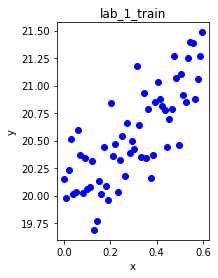

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def take_data(file_name):
    x = []
    y = []
    with open(file_name, mode='r') as data_file:
        data = csv.DictReader(data_file)
        for row in data:
            x.append(float(row['x']))
            y.append(float(row['y']))
    data_forxy = {"x": np.array(x), "y": np.array(y)}
    return data_forxy


def create_plot(file_name, index, name, param):
    data_forxy = take_data(file_name)
    plt.subplot(1, 2, index)
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(data_forxy['x'], data_forxy['y'], param)


figure = plt.gcf()
create_plot('lab_1_train.csv', 1, 'lab_1_train', 'bo')
plt.show()

In [4]:
def gradient_descent(x, y, koef=0.01, iter_n=5000):
    m = x.shape[0]
    changes = []
    theta, bias = 0, 0
    for i in range(iter_n):
        hypothesis = np.dot(x, theta) + bias
        change = hypothesis - y
        changes.append(-np.mean(change))

        gradient = np.dot(x.T, change) / m
        dbias = np.sum(change) / m
        theta = theta - koef * gradient
        bias = bias - koef * dbias

        loss = np.sum((y - (np.dot(x, theta) + bias))) / m
        print(f"iter_num = {i};  theta = {theta};  bias = {bias};  loss = {loss}")
    return theta, bias, changes


x = take_data('lab_1_train.csv')['x']
y = take_data('lab_1_train.csv')['y']
koef = 0.01
iter_n = 5000
theta_after, bias_after, changes = gradient_descent(x, y, koef, iter_n)


iter_num = 0;  theta = 0.06183906732682434;  bias = 0.20549563191038453;  loss = 20.325640766338758
iter_num = 1;  theta = 0.12299196792752087;  bias = 0.40875203957377215;  loss = 20.104162029708498
iter_num = 2;  theta = 0.1834661934701276;  bias = 0.6097936598708571;  loss = 19.88510031190124
iter_num = 3;  theta = 0.24326915386121906;  bias = 0.8086446629898695;  loss = 19.6684292347263
iter_num = 4;  theta = 0.3024081781382133;  bias = 1.0053289553371325;  loss = 19.45412270787225
iter_num = 5;  theta = 0.36089051535194017;  bias = 1.199870182415855;  loss = 19.2421549257652
iter_num = 6;  theta = 0.41872333543957824;  bias = 1.392291731673507;  loss = 19.032500364461225
iter_num = 7;  theta = 0.4759137300880643;  bias = 1.5826167353181193;  loss = 18.825133778572877
iter_num = 8;  theta = 0.5324687135880806;  bias = 1.770868073103848;  loss = 18.620030198229067
iter_num = 9;  theta = 0.5883952236787214;  bias = 1.9570683750861386;  loss = 18.417164926068246
iter_num = 10;  theta 

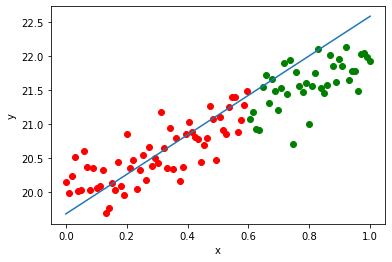

In [5]:
training_set = take_data('lab_1_train.csv')
test_set = take_data('lab_1_test.csv')


def show():
    x_total = np.concatenate((training_set['x'], test_set['x']))
    y_pred_total = theta_after * x_total + bias_after

    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(training_set['x'], training_set['y'], 'ro')
    plt.plot(test_set['x'], test_set['y'], 'go')
    plt.plot(x_total, y_pred_total)
    plt.show()


show()
